In [1]:
import pandas as pd 
import numpy as np 

path = './data/ieee_cis_transaction_data.csv'
df = pd.read_csv(path, index_col='TransactionID')
label = 'isFraud'
X = df.iloc[:,:-1].to_numpy()
y = df[label].to_numpy()

In [2]:
import xgboost as xgb
import catboost as cat
import lightgbm as lgb
from sklearn.metrics import roc_auc_score


X_train, X_test = X[:3*X.shape[0]//4], X[3*X.shape[0]//4:]
y_train, y_test = y[:3*X.shape[0]//4], y[3*X.shape[0]//4:]


In [ ]:
AUC = []
for i in range(10):
    clf = xgb.XGBClassifier( 
            n_estimators=2000,
            max_depth=12, 
            learning_rate=0.02,  
            subsample=0.8,
            colsample_bytree=0.4, 
            missing=-1, 
            eval_metric='auc',
            seed = i,
            # USE GPU
            tree_method='gpu_hist' )
    print()
    print('%sth runs of XGBoost:'% (i+1))       
    history = clf.fit(X_train, y_train, 
            eval_set=[(X_test,y_test)],
            verbose=50, early_stopping_rounds=100)

    y_probs = clf.predict_proba(X_test)[:,1]
    
    auc = roc_auc_score(y_test,y_probs)
    AUC.append(auc)
    print ('AUC:', auc)

print('AUC mean ± dev of 10 runs:',np.mean(AUC),'±', np.std(AUC))

In [3]:
AUC = []
for i in range(1):
    clf = xgb.XGBClassifier( 
            n_estimators=2000,
            max_depth=12, 
            learning_rate=0.02,  
            subsample=0.8,
            colsample_bytree=0.4, 
            missing=-1, 
            eval_metric='auc',
            seed = i,
            # USE GPU
            tree_method='gpu_hist' )
    print()
    print('%sth runs of XGBoost:'% (i+1))       
    history = clf.fit(X_train, y_train, 
            eval_set=[(X_test,y_test)],
            verbose=50, early_stopping_rounds=100)

    y_probs = clf.predict_proba(X_test)[:,1]
    
    auc = roc_auc_score(y_test,y_probs)
    AUC.append(auc)
    print ('AUC:', auc)

print('AUC mean ± dev of 10 runs:',np.mean(AUC),'±', np.std(AUC))


1th runs of XGBoost:


d:\Software\Anaconda3\envs\tabformer\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80042
[50]	validation_0-auc:0.87490
[100]	validation_0-auc:0.89013
[150]	validation_0-auc:0.90566
[200]	validation_0-auc:0.91826
[250]	validation_0-auc:0.92582
[300]	validation_0-auc:0.93040
[350]	validation_0-auc:0.93330
[400]	validation_0-auc:0.93457
[450]	validation_0-auc:0.93517
[500]	validation_0-auc:0.93564
[550]	validation_0-auc:0.93568
[593]	validation_0-auc:0.93552
AUC: 0.9357358433463538
AUC mean ± dev of 10 runs: 0.9357358433463538 ± 0.0


In [5]:
from sklearn.metrics import auc, precision_recall_curve, roc_curve, roc_auc_score


prob = clf.predict_proba(X_test)
print(prob)


[[9.9563640e-01 4.3636248e-03]
 [9.9905270e-01 9.4728410e-04]
 [9.9915332e-01 8.4669876e-04]
 ...
 [9.9677014e-01 3.2298337e-03]
 [9.6012211e-01 3.9877884e-02]
 [9.9315536e-01 6.8446137e-03]]


In [14]:
precision, recall, _ = precision_recall_curve(y_test, prob[:,1])
print(precision.shape, recall.shape)
print('auprc', auc(recall, precision))
fp, tp, _ = roc_curve(y_test, prob[:,1])
print(auc(fp, tp))
print(roc_auc_score(y_test, prob[:,1]))

(145137,) (145137,)
auprc 0.6095275975981946
0.9357358433463538
0.9357358433463538


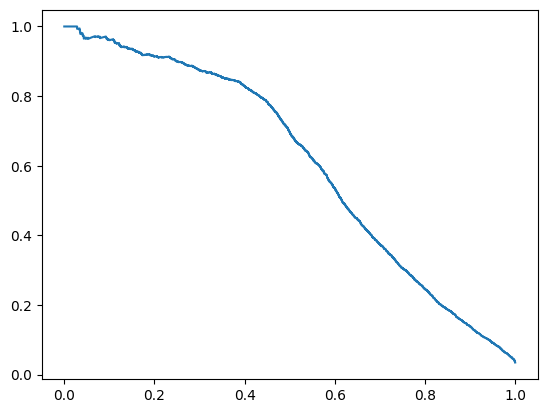

In [16]:
import matplotlib.pyplot as plt 

plt.plot(recall, precision)

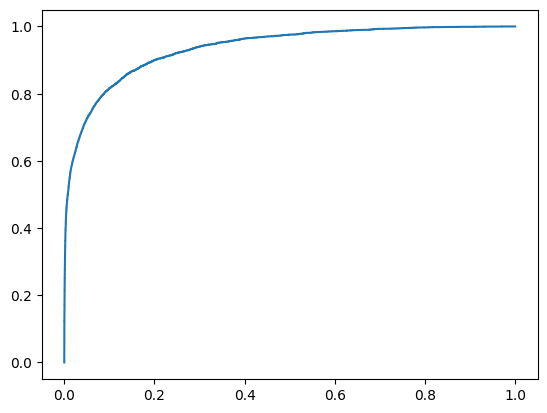

In [17]:
plt.plot(fp, tp)

In [30]:
AUC = []

for i in range(10):
    clf = cat.CatBoostClassifier( 
            n_estimators=2000,
            max_depth=12, 
            learning_rate=0.02,  
            eval_metric='AUC',
            random_seed = i,
            task_type='GPU')
            
    print('%sth runs of CatBoost:'% (i+1))       
    history = clf.fit(X_train, y_train, 
            eval_set=[(X_test,y_test)],
            verbose=50, early_stopping_rounds=100)
    y_probs = clf.predict_proba(X_test)[:,1]
    y_preds = clf.predict(X_test)
    auc = roc_auc_score(y_test,y_probs)

    AUC.append(auc)
    print ('AUC:', auc)

print('AUC mean ± dev of 10 runs:',np.mean(AUC),'±', np.std(AUC))
# print('F1 score mean ± dev of 10 runs:',np.mean(F1_score),'±', np.std(F1_score))

1th runs of CatBoost:


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7325406	best: 0.7325406 (0)	total: 101ms	remaining: 3m 21s
50:	test: 0.8591791	best: 0.8591791 (50)	total: 3.96s	remaining: 2m 31s
100:	test: 0.8771370	best: 0.8771370 (100)	total: 7.98s	remaining: 2m 29s
150:	test: 0.8866958	best: 0.8866958 (150)	total: 12s	remaining: 2m 27s
200:	test: 0.8923355	best: 0.8923355 (200)	total: 16s	remaining: 2m 23s
250:	test: 0.8974253	best: 0.8974253 (250)	total: 20s	remaining: 2m 19s
300:	test: 0.9017337	best: 0.9017337 (300)	total: 24s	remaining: 2m 15s
350:	test: 0.9059599	best: 0.9059599 (350)	total: 28.1s	remaining: 2m 11s
400:	test: 0.9087914	best: 0.9087914 (400)	total: 32.1s	remaining: 2m 7s
450:	test: 0.9118241	best: 0.9118241 (450)	total: 36.2s	remaining: 2m 4s
500:	test: 0.9136303	best: 0.9136303 (500)	total: 40.1s	remaining: 2m
550:	test: 0.9154741	best: 0.9154741 (550)	total: 44.1s	remaining: 1m 56s
600:	test: 0.9167871	best: 0.9167871 (600)	total: 48.1s	remaining: 1m 52s
650:	test: 0.9186094	best: 0.9186094 (650)	total: 52.1s	re

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8039574	best: 0.8039574 (0)	total: 98.8ms	remaining: 3m 17s
50:	test: 0.8623767	best: 0.8623767 (50)	total: 3.95s	remaining: 2m 30s
100:	test: 0.8780962	best: 0.8780962 (100)	total: 8s	remaining: 2m 30s
150:	test: 0.8871562	best: 0.8871562 (150)	total: 12.1s	remaining: 2m 27s
200:	test: 0.8942344	best: 0.8942344 (200)	total: 16.1s	remaining: 2m 24s
250:	test: 0.8994272	best: 0.8994272 (250)	total: 20.1s	remaining: 2m 19s
300:	test: 0.9031436	best: 0.9031436 (300)	total: 24.2s	remaining: 2m 16s
350:	test: 0.9069928	best: 0.9069928 (350)	total: 28.2s	remaining: 2m 12s
400:	test: 0.9099538	best: 0.9099538 (400)	total: 32.3s	remaining: 2m 8s
450:	test: 0.9127720	best: 0.9127720 (450)	total: 36.3s	remaining: 2m 4s
500:	test: 0.9149951	best: 0.9149951 (500)	total: 40.3s	remaining: 2m
550:	test: 0.9173722	best: 0.9173722 (550)	total: 44.3s	remaining: 1m 56s
600:	test: 0.9192998	best: 0.9192998 (600)	total: 48.3s	remaining: 1m 52s
650:	test: 0.9202846	best: 0.9202917 (649)	total: 52

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8078220	best: 0.8078220 (0)	total: 97.2ms	remaining: 3m 14s
50:	test: 0.8588669	best: 0.8588669 (50)	total: 3.98s	remaining: 2m 32s
100:	test: 0.8761079	best: 0.8761079 (100)	total: 8.02s	remaining: 2m 30s
150:	test: 0.8854425	best: 0.8854425 (150)	total: 12s	remaining: 2m 27s
200:	test: 0.8921844	best: 0.8922050 (198)	total: 16.1s	remaining: 2m 23s
250:	test: 0.8978866	best: 0.8978866 (250)	total: 20.1s	remaining: 2m 20s
300:	test: 0.9022821	best: 0.9022821 (300)	total: 24.2s	remaining: 2m 16s
350:	test: 0.9060194	best: 0.9060194 (350)	total: 28.3s	remaining: 2m 12s
400:	test: 0.9094468	best: 0.9094468 (400)	total: 32.4s	remaining: 2m 9s
450:	test: 0.9129262	best: 0.9129262 (450)	total: 36.7s	remaining: 2m 5s
500:	test: 0.9148808	best: 0.9148808 (500)	total: 40.6s	remaining: 2m 1s
550:	test: 0.9171600	best: 0.9171600 (550)	total: 44.6s	remaining: 1m 57s
600:	test: 0.9185937	best: 0.9185937 (600)	total: 48.7s	remaining: 1m 53s
650:	test: 0.9200083	best: 0.9200194 (649)	total

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7965609	best: 0.7965609 (0)	total: 98.3ms	remaining: 3m 16s
50:	test: 0.8603353	best: 0.8603353 (50)	total: 4.02s	remaining: 2m 33s
100:	test: 0.8773237	best: 0.8773237 (100)	total: 8.12s	remaining: 2m 32s
150:	test: 0.8867584	best: 0.8867584 (150)	total: 12.3s	remaining: 2m 30s
200:	test: 0.8926086	best: 0.8926086 (200)	total: 16.3s	remaining: 2m 25s
250:	test: 0.8984506	best: 0.8984506 (250)	total: 20.5s	remaining: 2m 22s
300:	test: 0.9028367	best: 0.9028367 (300)	total: 24.5s	remaining: 2m 18s
350:	test: 0.9068090	best: 0.9068090 (350)	total: 28.6s	remaining: 2m 14s
400:	test: 0.9097460	best: 0.9097460 (400)	total: 32.6s	remaining: 2m 10s
450:	test: 0.9124134	best: 0.9124134 (450)	total: 36.6s	remaining: 2m 5s
500:	test: 0.9155374	best: 0.9155374 (500)	total: 40.6s	remaining: 2m 1s
550:	test: 0.9173030	best: 0.9173030 (550)	total: 44.7s	remaining: 1m 57s
600:	test: 0.9188576	best: 0.9188576 (600)	total: 48.7s	remaining: 1m 53s
650:	test: 0.9199621	best: 0.9199621 (650)	to

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8135471	best: 0.8135471 (0)	total: 99.8ms	remaining: 3m 19s
50:	test: 0.8625166	best: 0.8625166 (50)	total: 4.01s	remaining: 2m 33s
100:	test: 0.8772822	best: 0.8772822 (100)	total: 8.09s	remaining: 2m 32s
150:	test: 0.8886824	best: 0.8886824 (150)	total: 12.2s	remaining: 2m 29s
200:	test: 0.8934292	best: 0.8934292 (200)	total: 16.3s	remaining: 2m 25s
250:	test: 0.8981735	best: 0.8981735 (250)	total: 20.4s	remaining: 2m 21s
300:	test: 0.9022793	best: 0.9022793 (300)	total: 24.4s	remaining: 2m 17s
350:	test: 0.9056081	best: 0.9056081 (350)	total: 28.5s	remaining: 2m 13s
400:	test: 0.9094670	best: 0.9094670 (400)	total: 32.6s	remaining: 2m 9s
450:	test: 0.9119232	best: 0.9119232 (450)	total: 36.6s	remaining: 2m 5s
500:	test: 0.9141004	best: 0.9141004 (500)	total: 40.7s	remaining: 2m 1s
550:	test: 0.9158119	best: 0.9158198 (548)	total: 44.8s	remaining: 1m 57s
600:	test: 0.9179765	best: 0.9179765 (600)	total: 48.8s	remaining: 1m 53s
650:	test: 0.9194154	best: 0.9194154 (650)	tot

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8153146	best: 0.8153146 (0)	total: 94.7ms	remaining: 3m 9s
50:	test: 0.8626124	best: 0.8629943 (48)	total: 3.96s	remaining: 2m 31s
100:	test: 0.8791403	best: 0.8791403 (100)	total: 8.05s	remaining: 2m 31s
150:	test: 0.8887413	best: 0.8887413 (150)	total: 12.1s	remaining: 2m 28s
200:	test: 0.8943264	best: 0.8943264 (200)	total: 16.1s	remaining: 2m 24s
250:	test: 0.8992479	best: 0.8992479 (250)	total: 20.2s	remaining: 2m 20s
300:	test: 0.9037893	best: 0.9037893 (300)	total: 24.2s	remaining: 2m 16s
350:	test: 0.9073257	best: 0.9073257 (350)	total: 28.3s	remaining: 2m 12s
400:	test: 0.9102685	best: 0.9102685 (400)	total: 32.3s	remaining: 2m 8s
450:	test: 0.9129955	best: 0.9129955 (450)	total: 36.2s	remaining: 2m 4s
500:	test: 0.9151104	best: 0.9151104 (500)	total: 40.2s	remaining: 2m
550:	test: 0.9167103	best: 0.9167103 (550)	total: 44.3s	remaining: 1m 56s
600:	test: 0.9186511	best: 0.9186511 (600)	total: 48.3s	remaining: 1m 52s
650:	test: 0.9202644	best: 0.9202749 (649)	total: 

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7616392	best: 0.7616392 (0)	total: 99.1ms	remaining: 3m 18s
50:	test: 0.8592271	best: 0.8592271 (50)	total: 4.02s	remaining: 2m 33s
100:	test: 0.8771040	best: 0.8771040 (100)	total: 8.1s	remaining: 2m 32s
150:	test: 0.8852225	best: 0.8852225 (150)	total: 12.2s	remaining: 2m 29s
200:	test: 0.8924841	best: 0.8924841 (200)	total: 16.3s	remaining: 2m 26s
250:	test: 0.8988251	best: 0.8988251 (250)	total: 20.5s	remaining: 2m 23s
300:	test: 0.9028841	best: 0.9028841 (300)	total: 24.6s	remaining: 2m 19s
350:	test: 0.9064376	best: 0.9064376 (350)	total: 28.8s	remaining: 2m 15s
400:	test: 0.9107304	best: 0.9107304 (400)	total: 33s	remaining: 2m 11s
450:	test: 0.9133401	best: 0.9133401 (450)	total: 37.1s	remaining: 2m 7s
500:	test: 0.9152130	best: 0.9152130 (500)	total: 41.3s	remaining: 2m 3s
550:	test: 0.9172893	best: 0.9172893 (550)	total: 45.4s	remaining: 1m 59s
600:	test: 0.9189066	best: 0.9189066 (600)	total: 49.5s	remaining: 1m 55s
650:	test: 0.9200987	best: 0.9200987 (650)	total

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7751230	best: 0.7751230 (0)	total: 99.8ms	remaining: 3m 19s
50:	test: 0.8660301	best: 0.8666210 (49)	total: 4.03s	remaining: 2m 34s
100:	test: 0.8790222	best: 0.8790222 (100)	total: 8.07s	remaining: 2m 31s
150:	test: 0.8879657	best: 0.8879657 (150)	total: 12.2s	remaining: 2m 28s
200:	test: 0.8932807	best: 0.8932807 (200)	total: 16.2s	remaining: 2m 24s
250:	test: 0.8982209	best: 0.8982209 (250)	total: 20.2s	remaining: 2m 20s
300:	test: 0.9026026	best: 0.9026026 (300)	total: 24.3s	remaining: 2m 17s
350:	test: 0.9063501	best: 0.9063501 (350)	total: 28.4s	remaining: 2m 13s
400:	test: 0.9096869	best: 0.9096869 (400)	total: 32.5s	remaining: 2m 9s
450:	test: 0.9122769	best: 0.9122769 (450)	total: 36.5s	remaining: 2m 5s
500:	test: 0.9148026	best: 0.9148026 (500)	total: 40.6s	remaining: 2m 1s
550:	test: 0.9164958	best: 0.9164958 (550)	total: 44.6s	remaining: 1m 57s
600:	test: 0.9179285	best: 0.9179285 (600)	total: 48.6s	remaining: 1m 53s
650:	test: 0.9190692	best: 0.9190692 (650)	tot

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8025591	best: 0.8025591 (0)	total: 104ms	remaining: 3m 26s
50:	test: 0.8616587	best: 0.8616587 (50)	total: 3.97s	remaining: 2m 31s
100:	test: 0.8785276	best: 0.8785276 (100)	total: 8.09s	remaining: 2m 32s
150:	test: 0.8876154	best: 0.8876154 (150)	total: 12.1s	remaining: 2m 28s
200:	test: 0.8936125	best: 0.8936125 (200)	total: 16.2s	remaining: 2m 24s
250:	test: 0.8992022	best: 0.8992022 (250)	total: 20.2s	remaining: 2m 20s
300:	test: 0.9030434	best: 0.9030434 (300)	total: 24.3s	remaining: 2m 17s
350:	test: 0.9061503	best: 0.9061503 (350)	total: 28.3s	remaining: 2m 12s
400:	test: 0.9093081	best: 0.9093081 (400)	total: 32.4s	remaining: 2m 9s
450:	test: 0.9120399	best: 0.9120399 (450)	total: 36.4s	remaining: 2m 4s
500:	test: 0.9152032	best: 0.9152032 (500)	total: 40.5s	remaining: 2m 1s
550:	test: 0.9173208	best: 0.9173208 (550)	total: 44.6s	remaining: 1m 57s
600:	test: 0.9192007	best: 0.9192007 (600)	total: 48.6s	remaining: 1m 53s
650:	test: 0.9202887	best: 0.9203033 (645)	tota

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7870573	best: 0.7870573 (0)	total: 101ms	remaining: 3m 21s
50:	test: 0.8605309	best: 0.8605309 (50)	total: 3.93s	remaining: 2m 30s
100:	test: 0.8774443	best: 0.8774443 (100)	total: 8.01s	remaining: 2m 30s
150:	test: 0.8870377	best: 0.8870377 (150)	total: 12.1s	remaining: 2m 27s
200:	test: 0.8931795	best: 0.8931795 (200)	total: 16.1s	remaining: 2m 24s
250:	test: 0.8988180	best: 0.8988367 (248)	total: 20.2s	remaining: 2m 20s
300:	test: 0.9025463	best: 0.9025634 (299)	total: 24.2s	remaining: 2m 16s
350:	test: 0.9061711	best: 0.9061711 (350)	total: 28.2s	remaining: 2m 12s
400:	test: 0.9097762	best: 0.9097762 (400)	total: 32.3s	remaining: 2m 8s
450:	test: 0.9127378	best: 0.9127378 (450)	total: 36.3s	remaining: 2m 4s
500:	test: 0.9155402	best: 0.9155402 (500)	total: 40.3s	remaining: 2m
550:	test: 0.9172618	best: 0.9172618 (550)	total: 44.4s	remaining: 1m 56s
600:	test: 0.9187142	best: 0.9187142 (600)	total: 48.3s	remaining: 1m 52s
650:	test: 0.9203061	best: 0.9203074 (649)	total: 

In [31]:
path = './data/card_transaction.v1.encoded.500000.csv'
df = pd.read_csv(path, index_col=0)
print(df.head())
label = 'Is Fraud?'
X = df.iloc[:,:-1].to_numpy()
y = df[label].to_numpy()


X_train, X_test = X[:3*X.shape[0]//4], X[3*X.shape[0]//4:]
y_train, y_test = y[:3*X.shape[0]//4], y[3*X.shape[0]//4:]


   User  Card  Timestamp    Amount  Use Chip  Merchant Name  Merchant City  \
0     0     0   0.183639  4.898511         2          69374           6275   
1     0     0   0.550250  3.650139         2          46284           7828   
2     0     0   0.721090  4.790321         2          46284           7828   
3     0     0   0.120866  4.859425         2          68751           7828   
4     0     0   0.258540  4.651195         2          81833           6275   

   Merchant State    Zip  MCC  Errors?  Is Fraud?  
0              28  24757   53       22          0  
1              28  24759   56       22          0  
2              28  24759   56       22          0  
3              28  24759   61       22          0  
4              28  24757   74       22          0  


In [46]:
AUC = []
for i in range(10):
    clf = xgb.XGBClassifier( 
            n_estimators=2000,
            max_depth=8, 
            learning_rate=0.05,  
            subsample=0.8,
            colsample_bytree=0.2, 
            missing=-1, 
            eval_metric='auc',
            seed = i,
            # USE GPU
            tree_method='gpu_hist',
            early_stopping_rounds=100 )
    print()
    print('%sth runs of XGBoost:'% (i+1))       
    history = clf.fit(X_train, y_train, 
            eval_set=[(X_test,y_test)],
            verbose=50, )

    y_probs = clf.predict_proba(X_test)[:,1]
    
    auc = roc_auc_score(y_test,y_probs)
    AUC.append(auc)
    print ('AUC:', auc)

print('AUC mean ± dev of 10 runs:',np.mean(AUC),'±', np.std(AUC))


1th runs of XGBoost:
[0]	validation_0-auc:0.50000
[50]	validation_0-auc:0.82659
[100]	validation_0-auc:0.87219
[150]	validation_0-auc:0.87956
[200]	validation_0-auc:0.89625
[250]	validation_0-auc:0.89899
[300]	validation_0-auc:0.89715
[317]	validation_0-auc:0.89618
AUC: 0.9008980226814775

2th runs of XGBoost:
[0]	validation_0-auc:0.50000
[50]	validation_0-auc:0.84307
[100]	validation_0-auc:0.86464
[150]	validation_0-auc:0.88479
[200]	validation_0-auc:0.90145
[250]	validation_0-auc:0.90553
[300]	validation_0-auc:0.91160
[350]	validation_0-auc:0.90922
[400]	validation_0-auc:0.90648
[406]	validation_0-auc:0.90677
AUC: 0.9119700962492215

3th runs of XGBoost:
[0]	validation_0-auc:0.50000
[50]	validation_0-auc:0.84531
[100]	validation_0-auc:0.87733
[150]	validation_0-auc:0.88712
[200]	validation_0-auc:0.88935
[250]	validation_0-auc:0.89795
[300]	validation_0-auc:0.89643
[350]	validation_0-auc:0.89435
[369]	validation_0-auc:0.89405
AUC: 0.9003183025213908

4th runs of XGBoost:
[0]	validati

In [47]:
AUC = []

for i in range(10):
    clf = cat.CatBoostClassifier( 
            n_estimators=2000,
            max_depth=12, 
            learning_rate=0.02,  
            eval_metric='AUC',
            random_seed = i,
            task_type='GPU')
            
    print('%sth runs of CatBoost:'% (i+1))       
    history = clf.fit(X_train, y_train, 
            eval_set=[(X_test,y_test)],
            verbose=50, early_stopping_rounds=100)
    y_probs = clf.predict_proba(X_test)[:,1]
    y_preds = clf.predict(X_test)
    auc = roc_auc_score(y_test,y_probs)

    AUC.append(auc)
    print ('AUC:', auc)

print('AUC mean ± dev of 10 runs:',np.mean(AUC),'±', np.std(AUC))

1th runs of CatBoost:


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8677865	best: 0.8677865 (0)	total: 17.3ms	remaining: 34.6s
50:	test: 0.8806809	best: 0.9100715 (4)	total: 2.19s	remaining: 1m 23s
100:	test: 0.8880800	best: 0.9100715 (4)	total: 4.36s	remaining: 1m 22s
bestTest = 0.9100714624
bestIteration = 4
Shrink model to first 5 iterations.
AUC: 0.9100714474126648
2th runs of CatBoost:


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8555900	best: 0.8555900 (0)	total: 22.8ms	remaining: 45.6s
50:	test: 0.8918232	best: 0.8968668 (1)	total: 2.22s	remaining: 1m 24s
100:	test: 0.8959931	best: 0.8981875 (93)	total: 4.41s	remaining: 1m 22s
150:	test: 0.8947061	best: 0.8981875 (93)	total: 6.59s	remaining: 1m 20s
bestTest = 0.8981874883
bestIteration = 93
Shrink model to first 94 iterations.
AUC: 0.8981874790895384
3th runs of CatBoost:


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8614103	best: 0.8614103 (0)	total: 18ms	remaining: 35.9s
50:	test: 0.8675710	best: 0.8893273 (1)	total: 2.19s	remaining: 1m 23s
100:	test: 0.8728213	best: 0.8893273 (1)	total: 4.38s	remaining: 1m 22s
bestTest = 0.8893272579
bestIteration = 1
Shrink model to first 2 iterations.
AUC: 0.8893272583087746
4th runs of CatBoost:


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8959322	best: 0.8959322 (0)	total: 30.4ms	remaining: 1m
50:	test: 0.8913170	best: 0.9007694 (3)	total: 2.24s	remaining: 1m 25s
100:	test: 0.8990600	best: 0.9007694 (3)	total: 4.43s	remaining: 1m 23s
bestTest = 0.9007694423
bestIteration = 3
Shrink model to first 4 iterations.
AUC: 0.9007694628465869
5th runs of CatBoost:


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8479691	best: 0.8479691 (0)	total: 12.7ms	remaining: 25.4s
50:	test: 0.8931335	best: 0.8938166 (47)	total: 2.17s	remaining: 1m 23s
100:	test: 0.8947873	best: 0.8949050 (85)	total: 4.35s	remaining: 1m 21s
150:	test: 0.8984306	best: 0.8992859 (147)	total: 6.54s	remaining: 1m 20s
200:	test: 0.8944778	best: 0.8992859 (147)	total: 8.75s	remaining: 1m 18s
bestTest = 0.8992859125
bestIteration = 147
Shrink model to first 148 iterations.
AUC: 0.8992858208320026
6th runs of CatBoost:


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.5533731	best: 0.5533731 (0)	total: 12.2ms	remaining: 24.3s
50:	test: 0.8348782	best: 0.8872456 (1)	total: 2.26s	remaining: 1m 26s
100:	test: 0.8537151	best: 0.8872456 (1)	total: 4.46s	remaining: 1m 23s
bestTest = 0.8872455657
bestIteration = 1
Shrink model to first 2 iterations.
AUC: 0.8872455665607906
7th runs of CatBoost:


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8229465	best: 0.8229465 (0)	total: 14.9ms	remaining: 29.8s
50:	test: 0.8885297	best: 0.8896397 (47)	total: 2.23s	remaining: 1m 25s
100:	test: 0.9000332	best: 0.9000332 (100)	total: 4.43s	remaining: 1m 23s
150:	test: 0.9022410	best: 0.9026771 (122)	total: 6.63s	remaining: 1m 21s
200:	test: 0.8979368	best: 0.9028995 (164)	total: 8.85s	remaining: 1m 19s
250:	test: 0.8981318	best: 0.9028995 (164)	total: 11s	remaining: 1m 16s
bestTest = 0.9028994739
bestIteration = 164
Shrink model to first 165 iterations.
AUC: 0.9028995699502868
8th runs of CatBoost:


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8600419	best: 0.8600419 (0)	total: 57.3ms	remaining: 1m 54s
50:	test: 0.8922434	best: 0.8930332 (47)	total: 2.28s	remaining: 1m 27s
100:	test: 0.9069273	best: 0.9069273 (100)	total: 4.49s	remaining: 1m 24s
150:	test: 0.9051340	best: 0.9082653 (117)	total: 6.69s	remaining: 1m 21s
200:	test: 0.9036362	best: 0.9082653 (117)	total: 8.91s	remaining: 1m 19s
bestTest = 0.9082652628
bestIteration = 117
Shrink model to first 118 iterations.
AUC: 0.9082651627708246
9th runs of CatBoost:


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8641747	best: 0.8641747 (0)	total: 85.9ms	remaining: 2m 51s
50:	test: 0.8787979	best: 0.8787979 (50)	total: 2.36s	remaining: 1m 30s
100:	test: 0.8898774	best: 0.8898774 (100)	total: 4.56s	remaining: 1m 25s
150:	test: 0.8935567	best: 0.8940848 (143)	total: 6.76s	remaining: 1m 22s
200:	test: 0.8949225	best: 0.8954915 (178)	total: 8.94s	remaining: 1m 20s
250:	test: 0.8991392	best: 0.9002114 (243)	total: 11.2s	remaining: 1m 17s
300:	test: 0.9024370	best: 0.9032734 (280)	total: 13.3s	remaining: 1m 15s
350:	test: 0.9023426	best: 0.9034498 (336)	total: 15.6s	remaining: 1m 13s
400:	test: 0.9013807	best: 0.9034498 (336)	total: 17.8s	remaining: 1m 10s
bestTest = 0.9034498036
bestIteration = 336
Shrink model to first 337 iterations.
AUC: 0.9034497942452725
10th runs of CatBoost:


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8257461	best: 0.8257461 (0)	total: 50.3ms	remaining: 1m 40s
50:	test: 0.8981108	best: 0.8981108 (50)	total: 2.35s	remaining: 1m 29s
100:	test: 0.9120864	best: 0.9126967 (98)	total: 4.62s	remaining: 1m 26s
150:	test: 0.9146997	best: 0.9165796 (145)	total: 6.84s	remaining: 1m 23s
200:	test: 0.9091587	best: 0.9165796 (145)	total: 9.07s	remaining: 1m 21s
bestTest = 0.9165795743
bestIteration = 145
Shrink model to first 146 iterations.
AUC: 0.9165795414994181
AUC mean ± dev of 10 runs: 0.901608110351616 ± 0.008485557770216319
